In [27]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)



In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [40]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
data_sold=pd.read_csv("C:/Users/aiswa/OneDrive/Data Science/ProjectPro/Retail Price Optimization/Cafe - Sell Meta Data.csv")
data_transactions=pd.read_csv("C:/Users/aiswa/OneDrive/Data Science/ProjectPro/Retail Price Optimization/Cafe - Transaction - Store.csv")
data_date=pd.read_csv("C:/Users/aiswa/OneDrive/Data Science/ProjectPro/Retail Price Optimization/Cafe - DateInfo.csv")

In [12]:
data_sold.head()
data_transactions.head()
data_date.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [15]:
data_sold.describe()
data_sold.describe(include = ['O']) 

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [17]:
# check for null
data_sold[data_sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


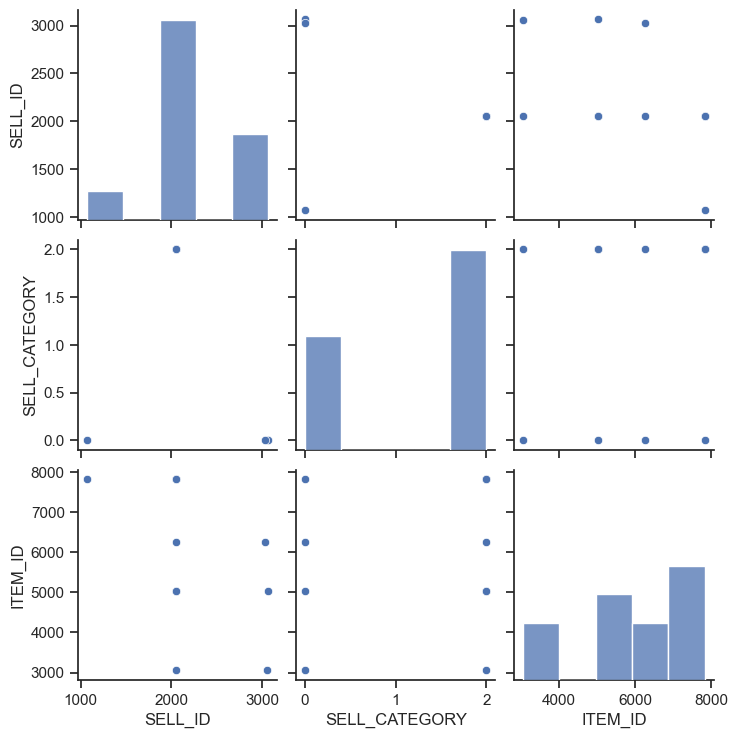

In [33]:
# plot a pairplot for the data
sns.pairplot(data_sold)

In [34]:
data_transactions[data_transactions.SELL_ID==1070]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.5,46,1070,0
4,01/02/12,15.5,70,1070,0
8,01/03/12,15.5,62,1070,0
12,01/04/12,15.5,88,1070,0
16,01/05/12,15.5,104,1070,0
...,...,...,...,...,...
5384,09/06/15,14.5,94,1070,0
5388,09/07/15,14.5,98,1070,0
5392,09/08/15,14.5,90,1070,0
5396,09/09/15,14.5,96,1070,0


In [35]:
data1= pd.merge(data_sold.drop(['ITEM_ID'],axis=1),data_transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(5)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104


In [37]:
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50    46
                                   01/01/13       15.50    60
                                   01/01/14       15.50    72
                                   01/01/15       14.00    66
                                   01/02/12       15.50    70
                                                           ..
2053     2              COKE       9/29/13        10.45    40
                                   9/29/14        12.77    46
                                   9/30/12        12.42    38
                                   9/30/13        10.45    38
                                   9/30/14        12.77    50
Name: QUANTITY, Length: 10792, dtype: int64

In [38]:
data1.shape # check the shape
intermediate_data = b.reset_index()

(10808, 6)

In [41]:
intermediate_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.50,46
1,1070,0,BURGER,01/01/13,15.50,60
2,1070,0,BURGER,01/01/14,15.50,72
3,1070,0,BURGER,01/01/15,14.00,66
4,1070,0,BURGER,01/02/12,15.50,70
5,1070,0,BURGER,01/02/13,15.50,68
6,1070,0,BURGER,01/02/14,15.50,76
7,1070,0,BURGER,01/02/15,14.00,102
8,1070,0,BURGER,01/03/12,15.50,62
9,1070,0,BURGER,01/03/13,15.50,70
